In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, "../")

In [11]:
import torch
import torch.nn as nn
from torchsummary import summary

from data.input_transforms import InputTransform
from data.cifar import CIFAR
from data.dataloader import get_dataloader
from models.optimizer import optimizer, scheduler
from networks.twolayernet import TwolayerNet
from networks.convnet import ConvNet
from utils.viz import plot_multiple_quantities_by_time
from main import train, evaluate

In [4]:
def experiment(train_transforms, valid_transforms, network, num_epochs, batch_size, opt_args, sch_args=None):
    
    print(train_transforms)
    print(num_epochs)
    print(batch_size)
    print(opt_args)
    print(sch_args)
    
    # define the datasets
    train_transform = InputTransform(train_transforms)
    valid_transform = InputTransform(valid_transforms)
    train_dataset = CIFAR(root="../datasets/CIFAR-10/", mode="train", transform=train_transform)
    valid_dataset = CIFAR(root="../datasets/CIFAR-10/", mode="valid", transform=valid_transform)

    # obtain the train dataloader
    train_loader = get_dataloader(train_dataset, train=True, batch_size=batch_size, num_workers=0)
    valid_loader = get_dataloader(valid_dataset, train=False, batch_size=batch_size, num_workers=0)
    
    if network == "tln":
        net = TwolayerNet(num_inputs=3 * 32 * 32, num_hidden=512, num_classes=10)
    elif network == "cnn":
        net = ConvNet(in_channels=3, num_classes=10)
    else:
        raise ValueError()
    arch = type(net).__name__

    # define the optimizer and scheduler
    opt = optimizer(model_params=net.parameters(), **opt_args)
    sch = None
    if sch_args is not None:
        sch = scheduler(opt=opt, **sch_args)

    # define the loss function
    loss_fn = nn.CrossEntropyLoss()

    # train the model
    epochs, train_losses, train_metrics, valid_losses, valid_metrics = train(
        net, loss_fn, train_loader, valid_loader, num_epochs=num_epochs, opt=opt, sch=sch,
    )

    # plot training curves
    plot_multiple_quantities_by_time(
        quantities=[train_losses["loss"], valid_losses["loss"]],
        time=epochs,
        labels=["Train", "Validation"],
        title=f"{arch} Loss curves",
        show=True,
        save=True,
        save_path="../results/cnn_loss_plot_best.png",
        ylabel="Loss",
    )
    plot_multiple_quantities_by_time(
        quantities=[train_metrics["accuracy"], valid_metrics["accuracy"]],
        time=epochs,
        labels=["Train", "Validation"],
        title=f"{arch} Accuracy curves",
        show=True,
        save=True,
        save_path="../results/cnn_accu_plot_best.png",
        ylabel="Accuracy",
    )
    
    return net, loss_fn

[{'name': 'ToTensor', 'args': {}}, {'name': 'Normalize', 'args': {'mean': (0.5, 0.5, 0.5), 'std': (0.5, 0.5, 0.5)}}, {'name': 'RandomAffine', 'args': {'degrees': 10, 'translate': (0.1, 0.1), 'scale': (0.8, 1.2)}}]
100
128
{'name': 'Adam', 'lr': 0.001}
{'name': 'MultiStepLR', 'milestones': [50], 'gamma': 0.1}
Selecting 40000 for train.
Selecting 10000 for valid.


Evaluate: Epoch [1/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 115.61it/s]                                              


VALID 	: Summary: Loss: 1.6925 Accuracy: 0.3817
TRAIN 	: Summary: Loss: 1.9289 Accuracy: 0.2925


Evaluate: Epoch [2/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 111.43it/s]                                              


VALID 	: Summary: Loss: 1.5297 Accuracy: 0.4442
TRAIN 	: Summary: Loss: 1.6867 Accuracy: 0.3843


Evaluate: Epoch [3/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 124.71it/s]                                              


VALID 	: Summary: Loss: 1.4317 Accuracy: 0.4852
TRAIN 	: Summary: Loss: 1.5723 Accuracy: 0.4274


Evaluate: Epoch [4/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 127.22it/s]                                              


VALID 	: Summary: Loss: 1.3653 Accuracy: 0.5076
TRAIN 	: Summary: Loss: 1.5005 Accuracy: 0.4570


Evaluate: Epoch [5/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 125.03it/s]                                              


VALID 	: Summary: Loss: 1.3216 Accuracy: 0.5220
TRAIN 	: Summary: Loss: 1.4524 Accuracy: 0.4744


Evaluate: Epoch [6/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 112.68it/s]                                              


VALID 	: Summary: Loss: 1.2748 Accuracy: 0.5399
TRAIN 	: Summary: Loss: 1.4186 Accuracy: 0.4906


Evaluate: Epoch [7/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 123.84it/s]                                              


VALID 	: Summary: Loss: 1.2459 Accuracy: 0.5540
TRAIN 	: Summary: Loss: 1.3800 Accuracy: 0.5030


Evaluate: Epoch [8/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 111.79it/s]                                              


VALID 	: Summary: Loss: 1.2407 Accuracy: 0.5462
TRAIN 	: Summary: Loss: 1.3507 Accuracy: 0.5130


Evaluate: Epoch [9/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 126.14it/s]                                              


VALID 	: Summary: Loss: 1.1965 Accuracy: 0.5711
TRAIN 	: Summary: Loss: 1.3201 Accuracy: 0.5258


Evaluate: Epoch [10/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 128.06it/s]                                             


VALID 	: Summary: Loss: 1.1709 Accuracy: 0.5820
TRAIN 	: Summary: Loss: 1.2930 Accuracy: 0.5376


Evaluate: Epoch [11/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 122.65it/s]                                             


VALID 	: Summary: Loss: 1.1792 Accuracy: 0.5693
TRAIN 	: Summary: Loss: 1.2755 Accuracy: 0.5437


Evaluate: Epoch [12/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 124.06it/s]                                             


VALID 	: Summary: Loss: 1.1512 Accuracy: 0.5890
TRAIN 	: Summary: Loss: 1.2532 Accuracy: 0.5519


Evaluate: Epoch [13/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 117.27it/s]                                             


VALID 	: Summary: Loss: 1.1154 Accuracy: 0.5995
TRAIN 	: Summary: Loss: 1.2398 Accuracy: 0.5597


Evaluate: Epoch [14/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 123.84it/s]                                             


VALID 	: Summary: Loss: 1.1332 Accuracy: 0.5944
TRAIN 	: Summary: Loss: 1.2283 Accuracy: 0.5618


Evaluate: Epoch [15/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 124.32it/s]                                             


VALID 	: Summary: Loss: 1.1046 Accuracy: 0.6043
TRAIN 	: Summary: Loss: 1.2160 Accuracy: 0.5638


Evaluate: Epoch [16/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 125.65it/s]                                             


VALID 	: Summary: Loss: 1.1169 Accuracy: 0.6071
TRAIN 	: Summary: Loss: 1.1983 Accuracy: 0.5736


Evaluate: Epoch [17/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 122.21it/s]                                             


VALID 	: Summary: Loss: 1.0852 Accuracy: 0.6109
TRAIN 	: Summary: Loss: 1.1912 Accuracy: 0.5736


Evaluate: Epoch [18/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 127.72it/s]                                             


VALID 	: Summary: Loss: 1.0859 Accuracy: 0.6153
TRAIN 	: Summary: Loss: 1.1725 Accuracy: 0.5835


Evaluate: Epoch [19/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 125.42it/s]                                             


VALID 	: Summary: Loss: 1.0813 Accuracy: 0.6152
TRAIN 	: Summary: Loss: 1.1676 Accuracy: 0.5834


Evaluate: Epoch [20/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 122.04it/s]                                             


VALID 	: Summary: Loss: 1.0852 Accuracy: 0.6161
TRAIN 	: Summary: Loss: 1.1566 Accuracy: 0.5877


Evaluate: Epoch [21/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 123.06it/s]                                             


VALID 	: Summary: Loss: 1.0670 Accuracy: 0.6241
TRAIN 	: Summary: Loss: 1.1564 Accuracy: 0.5884


Evaluate: Epoch [22/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 111.02it/s]                                             


VALID 	: Summary: Loss: 1.0563 Accuracy: 0.6282
TRAIN 	: Summary: Loss: 1.1395 Accuracy: 0.5955


Evaluate: Epoch [23/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 127.72it/s]                                             


VALID 	: Summary: Loss: 1.0384 Accuracy: 0.6322
TRAIN 	: Summary: Loss: 1.1314 Accuracy: 0.5997


Evaluate: Epoch [24/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 126.35it/s]                                             


VALID 	: Summary: Loss: 1.0621 Accuracy: 0.6210
TRAIN 	: Summary: Loss: 1.1222 Accuracy: 0.6021


Evaluate: Epoch [25/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 123.42it/s]                                             


VALID 	: Summary: Loss: 1.0259 Accuracy: 0.6372
TRAIN 	: Summary: Loss: 1.1101 Accuracy: 0.6026


Evaluate: Epoch [26/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 128.50it/s]                                             


VALID 	: Summary: Loss: 1.0468 Accuracy: 0.6260
TRAIN 	: Summary: Loss: 1.1106 Accuracy: 0.6066


Evaluate: Epoch [27/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 127.76it/s]                                             


VALID 	: Summary: Loss: 1.0198 Accuracy: 0.6371
TRAIN 	: Summary: Loss: 1.1009 Accuracy: 0.6082


Evaluate: Epoch [28/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 123.41it/s]                                             


VALID 	: Summary: Loss: 1.0600 Accuracy: 0.6210
TRAIN 	: Summary: Loss: 1.0972 Accuracy: 0.6093


Evaluate: Epoch [29/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 129.96it/s]                                             


VALID 	: Summary: Loss: 1.0303 Accuracy: 0.6315
TRAIN 	: Summary: Loss: 1.0943 Accuracy: 0.6112


Evaluate: Epoch [30/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 123.83it/s]                                             


VALID 	: Summary: Loss: 1.0106 Accuracy: 0.6411
TRAIN 	: Summary: Loss: 1.0815 Accuracy: 0.6155


Evaluate: Epoch [31/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 126.35it/s]                                             


VALID 	: Summary: Loss: 1.0023 Accuracy: 0.6422
TRAIN 	: Summary: Loss: 1.0713 Accuracy: 0.6173


Evaluate: Epoch [32/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 124.17it/s]                                             


VALID 	: Summary: Loss: 0.9983 Accuracy: 0.6480
TRAIN 	: Summary: Loss: 1.0724 Accuracy: 0.6190


Evaluate: Epoch [33/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 125.23it/s]                                             


VALID 	: Summary: Loss: 1.0230 Accuracy: 0.6374
TRAIN 	: Summary: Loss: 1.0650 Accuracy: 0.6238


Evaluate: Epoch [34/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 121.10it/s]                                             


VALID 	: Summary: Loss: 1.0065 Accuracy: 0.6439
TRAIN 	: Summary: Loss: 1.0555 Accuracy: 0.6248


Evaluate: Epoch [35/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 126.78it/s]                                             


VALID 	: Summary: Loss: 0.9977 Accuracy: 0.6464
TRAIN 	: Summary: Loss: 1.0524 Accuracy: 0.6244


Evaluate: Epoch [36/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 127.14it/s]                                             


VALID 	: Summary: Loss: 0.9898 Accuracy: 0.6482
TRAIN 	: Summary: Loss: 1.0522 Accuracy: 0.6278


Evaluate: Epoch [37/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 126.35it/s]                                             


VALID 	: Summary: Loss: 0.9818 Accuracy: 0.6518
TRAIN 	: Summary: Loss: 1.0434 Accuracy: 0.6312


Evaluate: Epoch [38/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 126.19it/s]                                             


VALID 	: Summary: Loss: 0.9860 Accuracy: 0.6484
TRAIN 	: Summary: Loss: 1.0454 Accuracy: 0.6297


Evaluate: Epoch [39/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 126.49it/s]                                             


VALID 	: Summary: Loss: 1.0100 Accuracy: 0.6441
TRAIN 	: Summary: Loss: 1.0398 Accuracy: 0.6295


Evaluate: Epoch [40/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 111.94it/s]                                             


VALID 	: Summary: Loss: 0.9742 Accuracy: 0.6607
TRAIN 	: Summary: Loss: 1.0412 Accuracy: 0.6295


Evaluate: Epoch [41/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 92.81it/s]                                              


VALID 	: Summary: Loss: 0.9653 Accuracy: 0.6598
TRAIN 	: Summary: Loss: 1.0301 Accuracy: 0.6343


Evaluate: Epoch [42/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 121.10it/s]                                             


VALID 	: Summary: Loss: 0.9810 Accuracy: 0.6519
TRAIN 	: Summary: Loss: 1.0257 Accuracy: 0.6367


Evaluate: Epoch [43/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 123.55it/s]                                             


VALID 	: Summary: Loss: 0.9864 Accuracy: 0.6511
TRAIN 	: Summary: Loss: 1.0167 Accuracy: 0.6363


Evaluate: Epoch [44/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 120.07it/s]                                             


VALID 	: Summary: Loss: 0.9742 Accuracy: 0.6563
TRAIN 	: Summary: Loss: 1.0173 Accuracy: 0.6360


Evaluate: Epoch [45/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 123.33it/s]                                             


VALID 	: Summary: Loss: 0.9690 Accuracy: 0.6552
TRAIN 	: Summary: Loss: 1.0095 Accuracy: 0.6406


Evaluate: Epoch [46/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 122.20it/s]                                             


VALID 	: Summary: Loss: 0.9637 Accuracy: 0.6604
TRAIN 	: Summary: Loss: 1.0131 Accuracy: 0.6398


Evaluate: Epoch [47/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 118.87it/s]                                             


VALID 	: Summary: Loss: 0.9767 Accuracy: 0.6512
TRAIN 	: Summary: Loss: 1.0117 Accuracy: 0.6414


Evaluate: Epoch [48/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 124.80it/s]                                             


VALID 	: Summary: Loss: 0.9578 Accuracy: 0.6645
TRAIN 	: Summary: Loss: 1.0091 Accuracy: 0.6417


Evaluate: Epoch [49/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 123.62it/s]                                             


VALID 	: Summary: Loss: 0.9668 Accuracy: 0.6547
TRAIN 	: Summary: Loss: 1.0023 Accuracy: 0.6439


Evaluate: Epoch [50/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 128.31it/s]                                             


VALID 	: Summary: Loss: 0.9604 Accuracy: 0.6630
TRAIN 	: Summary: Loss: 1.0011 Accuracy: 0.6450


Evaluate: Epoch [51/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 96.71it/s]                                              


VALID 	: Summary: Loss: 0.9212 Accuracy: 0.6757
TRAIN 	: Summary: Loss: 0.9531 Accuracy: 0.6623


Evaluate: Epoch [52/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 122.29it/s]                                             


VALID 	: Summary: Loss: 0.9207 Accuracy: 0.6764
TRAIN 	: Summary: Loss: 0.9412 Accuracy: 0.6670


Evaluate: Epoch [53/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 97.88it/s]                                              


VALID 	: Summary: Loss: 0.9198 Accuracy: 0.6747
TRAIN 	: Summary: Loss: 0.9415 Accuracy: 0.6649


Evaluate: Epoch [54/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 124.73it/s]                                             


VALID 	: Summary: Loss: 0.9177 Accuracy: 0.6766
TRAIN 	: Summary: Loss: 0.9363 Accuracy: 0.6659


Evaluate: Epoch [55/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 125.87it/s]                                             


VALID 	: Summary: Loss: 0.9207 Accuracy: 0.6727
TRAIN 	: Summary: Loss: 0.9371 Accuracy: 0.6680


Evaluate: Epoch [56/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 126.07it/s]                                             


VALID 	: Summary: Loss: 0.9179 Accuracy: 0.6762
TRAIN 	: Summary: Loss: 0.9363 Accuracy: 0.6687


Evaluate: Epoch [57/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 120.93it/s]                                             


VALID 	: Summary: Loss: 0.9164 Accuracy: 0.6762
TRAIN 	: Summary: Loss: 0.9316 Accuracy: 0.6715


Evaluate: Epoch [58/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 118.00it/s]                                             


VALID 	: Summary: Loss: 0.9140 Accuracy: 0.6763
TRAIN 	: Summary: Loss: 0.9310 Accuracy: 0.6714


Evaluate: Epoch [59/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 121.22it/s]                                             


VALID 	: Summary: Loss: 0.9166 Accuracy: 0.6746
TRAIN 	: Summary: Loss: 0.9292 Accuracy: 0.6710


Evaluate: Epoch [60/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 123.75it/s]                                             


VALID 	: Summary: Loss: 0.9133 Accuracy: 0.6770
TRAIN 	: Summary: Loss: 0.9316 Accuracy: 0.6727


Evaluate: Epoch [61/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 124.36it/s]                                             


VALID 	: Summary: Loss: 0.9178 Accuracy: 0.6779
TRAIN 	: Summary: Loss: 0.9330 Accuracy: 0.6703


Evaluate: Epoch [62/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 126.46it/s]                                             


VALID 	: Summary: Loss: 0.9150 Accuracy: 0.6774
TRAIN 	: Summary: Loss: 0.9283 Accuracy: 0.6715


Evaluate: Epoch [63/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 113.47it/s]                                             


VALID 	: Summary: Loss: 0.9159 Accuracy: 0.6746
TRAIN 	: Summary: Loss: 0.9298 Accuracy: 0.6728


Evaluate: Epoch [64/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 95.87it/s]                                              


VALID 	: Summary: Loss: 0.9135 Accuracy: 0.6768
TRAIN 	: Summary: Loss: 0.9295 Accuracy: 0.6688


Evaluate: Epoch [65/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 124.60it/s]                                             


VALID 	: Summary: Loss: 0.9149 Accuracy: 0.6796
TRAIN 	: Summary: Loss: 0.9237 Accuracy: 0.6730


Evaluate: Epoch [66/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 126.50it/s]                                             


VALID 	: Summary: Loss: 0.9145 Accuracy: 0.6786
TRAIN 	: Summary: Loss: 0.9229 Accuracy: 0.6724


Evaluate: Epoch [67/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 123.21it/s]                                             


VALID 	: Summary: Loss: 0.9131 Accuracy: 0.6775
TRAIN 	: Summary: Loss: 0.9260 Accuracy: 0.6725


Evaluate: Epoch [68/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 126.80it/s]                                             


VALID 	: Summary: Loss: 0.9167 Accuracy: 0.6767
TRAIN 	: Summary: Loss: 0.9236 Accuracy: 0.6718


Evaluate: Epoch [69/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 122.84it/s]                                             


VALID 	: Summary: Loss: 0.9168 Accuracy: 0.6772
TRAIN 	: Summary: Loss: 0.9232 Accuracy: 0.6717


Evaluate: Epoch [70/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 124.63it/s]                                             


VALID 	: Summary: Loss: 0.9143 Accuracy: 0.6782
TRAIN 	: Summary: Loss: 0.9201 Accuracy: 0.6717


Evaluate: Epoch [71/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 120.91it/s]                                             


VALID 	: Summary: Loss: 0.9152 Accuracy: 0.6776
TRAIN 	: Summary: Loss: 0.9213 Accuracy: 0.6729


Evaluate: Epoch [72/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 123.32it/s]                                             


VALID 	: Summary: Loss: 0.9146 Accuracy: 0.6776
TRAIN 	: Summary: Loss: 0.9250 Accuracy: 0.6726


Evaluate: Epoch [73/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 115.53it/s]                                             


VALID 	: Summary: Loss: 0.9113 Accuracy: 0.6773
TRAIN 	: Summary: Loss: 0.9198 Accuracy: 0.6730


Evaluate: Epoch [74/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 114.00it/s]                                             


VALID 	: Summary: Loss: 0.9124 Accuracy: 0.6784
TRAIN 	: Summary: Loss: 0.9264 Accuracy: 0.6701


Evaluate: Epoch [75/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 91.41it/s]                                              


VALID 	: Summary: Loss: 0.9118 Accuracy: 0.6788
TRAIN 	: Summary: Loss: 0.9244 Accuracy: 0.6717


Evaluate: Epoch [76/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 124.08it/s]                                             


VALID 	: Summary: Loss: 0.9148 Accuracy: 0.6783
TRAIN 	: Summary: Loss: 0.9203 Accuracy: 0.6737


Evaluate: Epoch [77/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 119.03it/s]                                             


VALID 	: Summary: Loss: 0.9146 Accuracy: 0.6754
TRAIN 	: Summary: Loss: 0.9196 Accuracy: 0.6757


Evaluate: Epoch [78/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 121.53it/s]                                             


VALID 	: Summary: Loss: 0.9125 Accuracy: 0.6766
TRAIN 	: Summary: Loss: 0.9168 Accuracy: 0.6763


Evaluate: Epoch [79/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 121.50it/s]                                             


VALID 	: Summary: Loss: 0.9163 Accuracy: 0.6771
TRAIN 	: Summary: Loss: 0.9196 Accuracy: 0.6724


Evaluate: Epoch [80/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 125.65it/s]                                             


VALID 	: Summary: Loss: 0.9116 Accuracy: 0.6795
TRAIN 	: Summary: Loss: 0.9201 Accuracy: 0.6738


Evaluate: Epoch [81/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 125.72it/s]                                             


VALID 	: Summary: Loss: 0.9118 Accuracy: 0.6790
TRAIN 	: Summary: Loss: 0.9224 Accuracy: 0.6760


Evaluate: Epoch [82/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 122.77it/s]                                             


VALID 	: Summary: Loss: 0.9163 Accuracy: 0.6757
TRAIN 	: Summary: Loss: 0.9197 Accuracy: 0.6753


Evaluate: Epoch [83/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 119.64it/s]                                             


VALID 	: Summary: Loss: 0.9137 Accuracy: 0.6792
TRAIN 	: Summary: Loss: 0.9172 Accuracy: 0.6750


Evaluate: Epoch [84/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 113.54it/s]                                             


VALID 	: Summary: Loss: 0.9123 Accuracy: 0.6785
TRAIN 	: Summary: Loss: 0.9194 Accuracy: 0.6760


Evaluate: Epoch [85/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 122.36it/s]                                             


VALID 	: Summary: Loss: 0.9124 Accuracy: 0.6782
TRAIN 	: Summary: Loss: 0.9175 Accuracy: 0.6751


Evaluate: Epoch [86/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 124.61it/s]                                             


VALID 	: Summary: Loss: 0.9120 Accuracy: 0.6807
TRAIN 	: Summary: Loss: 0.9126 Accuracy: 0.6781


Evaluate: Epoch [87/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 118.49it/s]                                             


VALID 	: Summary: Loss: 0.9110 Accuracy: 0.6776
TRAIN 	: Summary: Loss: 0.9140 Accuracy: 0.6757


Evaluate: Epoch [88/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 125.10it/s]                                             


VALID 	: Summary: Loss: 0.9134 Accuracy: 0.6783
TRAIN 	: Summary: Loss: 0.9105 Accuracy: 0.6785


Evaluate: Epoch [89/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 113.93it/s]                                             


VALID 	: Summary: Loss: 0.9116 Accuracy: 0.6794
TRAIN 	: Summary: Loss: 0.9179 Accuracy: 0.6727


Evaluate: Epoch [90/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 126.48it/s]                                             


VALID 	: Summary: Loss: 0.9088 Accuracy: 0.6798
TRAIN 	: Summary: Loss: 0.9182 Accuracy: 0.6748


Evaluate: Epoch [91/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 122.56it/s]                                             


VALID 	: Summary: Loss: 0.9089 Accuracy: 0.6777
TRAIN 	: Summary: Loss: 0.9123 Accuracy: 0.6771


Evaluate: Epoch [92/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 125.70it/s]                                             


VALID 	: Summary: Loss: 0.9122 Accuracy: 0.6796
TRAIN 	: Summary: Loss: 0.9123 Accuracy: 0.6767


Evaluate: Epoch [93/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 122.49it/s]                                             


VALID 	: Summary: Loss: 0.9058 Accuracy: 0.6808
TRAIN 	: Summary: Loss: 0.9082 Accuracy: 0.6783


Evaluate: Epoch [94/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 124.87it/s]                                             


VALID 	: Summary: Loss: 0.9148 Accuracy: 0.6774
TRAIN 	: Summary: Loss: 0.9081 Accuracy: 0.6784


Evaluate: Epoch [95/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 117.05it/s]                                             


VALID 	: Summary: Loss: 0.9132 Accuracy: 0.6778
TRAIN 	: Summary: Loss: 0.9164 Accuracy: 0.6777


Evaluate: Epoch [96/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 118.53it/s]                                             


VALID 	: Summary: Loss: 0.9094 Accuracy: 0.6793
TRAIN 	: Summary: Loss: 0.9117 Accuracy: 0.6760


Evaluate: Epoch [97/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 121.44it/s]                                             


VALID 	: Summary: Loss: 0.9087 Accuracy: 0.6794
TRAIN 	: Summary: Loss: 0.9074 Accuracy: 0.6770


Evaluate: Epoch [98/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 118.88it/s]                                             


VALID 	: Summary: Loss: 0.9076 Accuracy: 0.6802
TRAIN 	: Summary: Loss: 0.9061 Accuracy: 0.6812


Evaluate: Epoch [99/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 125.56it/s]                                             


VALID 	: Summary: Loss: 0.9100 Accuracy: 0.6796
TRAIN 	: Summary: Loss: 0.9093 Accuracy: 0.6796


Evaluate: Epoch [100/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 127.17it/s]                                            


VALID 	: Summary: Loss: 0.9078 Accuracy: 0.6812
TRAIN 	: Summary: Loss: 0.9065 Accuracy: 0.6802


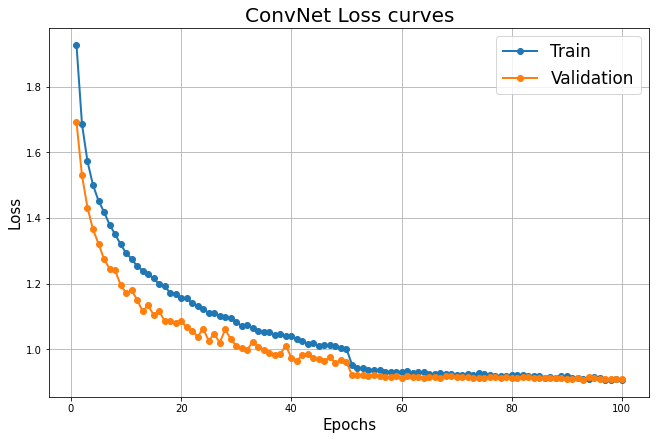

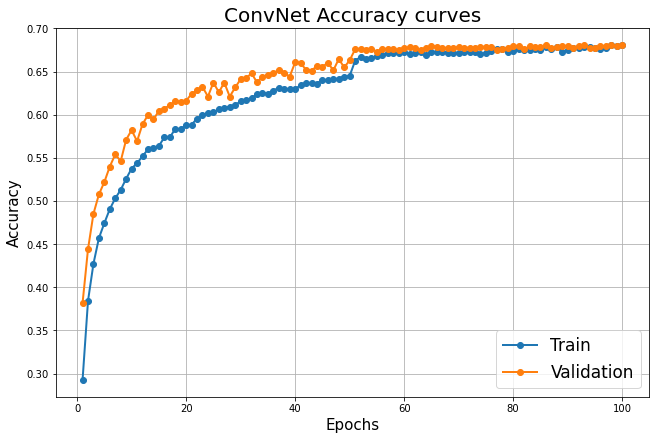

In [5]:
train_transforms = [
    {
        "name": "ToTensor",
        "args": {},
    },
    {
        "name": "Normalize",
        "args": {"mean": (0.5, 0.5, 0.5), "std": (0.5, 0.5, 0.5)},
    },
    {
        "name": "RandomAffine",
        "args": {"degrees": 10, "translate": (0.1, 0.1), "scale": (0.8, 1.2)},
    },
]
valid_transforms = [
    {
        "name": "ToTensor",
        "args": {},
    },
    {
        "name": "Normalize",
        "args": {"mean": (0.5, 0.5, 0.5), "std": (0.5, 0.5, 0.5)},
    },
]

network = "cnn"
num_epochs = 100
batch_size = 128
opt_args = {"name": "Adam", "lr": 1e-3}

sch_args = None
sch_args = {"name": "MultiStepLR", "milestones": [50], "gamma": 0.1}

net, loss_fn = experiment(
    train_transforms, valid_transforms, network, num_epochs, batch_size, opt_args, sch_args=sch_args,
)

In [6]:
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
              ReLU-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
              ReLU-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0
            Linear-7                  [-1, 120]          48,120
              ReLU-8                  [-1, 120]               0
            Linear-9                   [-1, 84]          10,164
             ReLU-10                   [-1, 84]               0
           Linear-11                   [-1, 10]             850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/ba

In [7]:
test_transforms = [
    {
        "name": "ToTensor",
        "args": {},
    },
    {
        "name": "Normalize",
        "args": {"mean": (0.5, 0.5, 0.5), "std": (0.5, 0.5, 0.5)},
    },
]
test_transform = InputTransform(test_transforms)
test_dataset = CIFAR(root="../datasets/CIFAR-10/", mode="test", transform=test_transform)
test_loader = get_dataloader(test_dataset, train=False, batch_size=128, num_workers=0)

In [8]:
evaluate(net, test_loader, loss_fn, 1, 1, "test")

Evaluate: Epoch [1/1]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 128.76it/s]                                                

TEST 	: Summary: Loss: 0.9494 Accuracy: 0.6716


(0.9494288541093657, 0.6716)

In [12]:
torch.save(net, "../checkpoints/cnn_best_hparams.pt")